Import

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

Global variables

In [253]:
COLORS = [ "#2c7bb6", "#fdae61", "#d7191c"]

In [254]:
def convertData(driversData, title, pilots):
    columns = driversData.columns.tolist()
    driversData['GAINED D1'] = driversData['ST D1'] - driversData['POS D1']
    driversData['GAINED D2'] = driversData['ST D2'] - driversData['POS D2']
    sommaD1 = driversData[driversData['GAINED D1'] > 0]['GAINED D1'].sum()
    sommaD2 = driversData[driversData['GAINED D2'] > 0]['GAINED D2'].sum()
    if 'S ST D1' in columns:
        driversData['SP GAIN D1'] = driversData['S ST D1'] - driversData['SPRINT D1']
        driversData['SP GAIN D2'] = driversData['S ST D2'] - driversData['SPRINT D2']
        sprintD1 = driversData[driversData['SP GAIN D1'] > 0]['SP GAIN D1'].sum()
        sprintD2 = driversData[driversData['SP GAIN D2'] > 0]['SP GAIN D2'].sum()
        sommaD1 += sprintD1
        sommaD2 += sprintD2
    posgained = [sommaD1,sommaD2]
    if 'POS D3' in columns:
        driversData['GAINED D3'] = driversData['ST D3'] - driversData['POS D3']
        sommaD3 = driversData[driversData['GAINED D3'] > 0]['GAINED D3'].sum()
        posgained.append(sommaD3)
    drawChart(posgained, pilots)

In [255]:
def drawChart(posgained, pilots):
    fig, ax = plt.subplots()
    bars = ax.barh(pilots, posgained, height=0.5, color=COLORS)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    # ax.invert_yaxis()   # legge le label dall'alto al basso
    plt.ylim(-1, 3)
    ax.bar_label(bars, padding=10)
    ax.set_xlabel('Posizioni')
    plt.title('Posizioni conquistate nella stagione')
    plt.show()

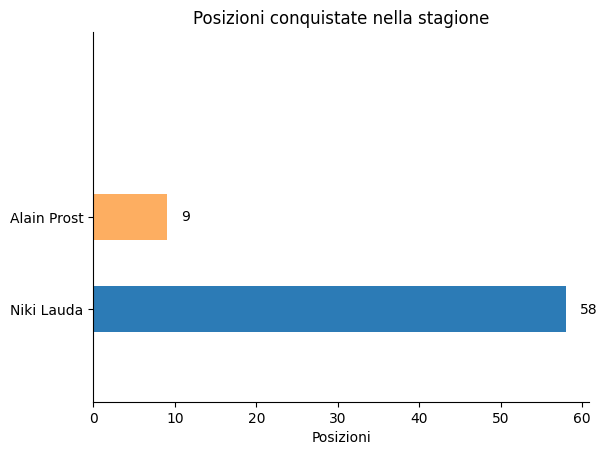

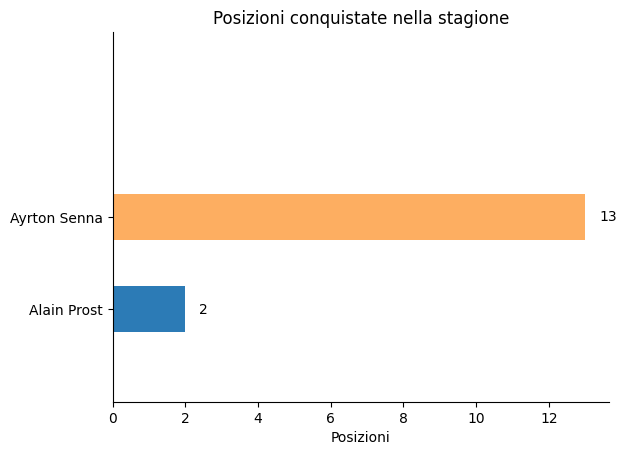

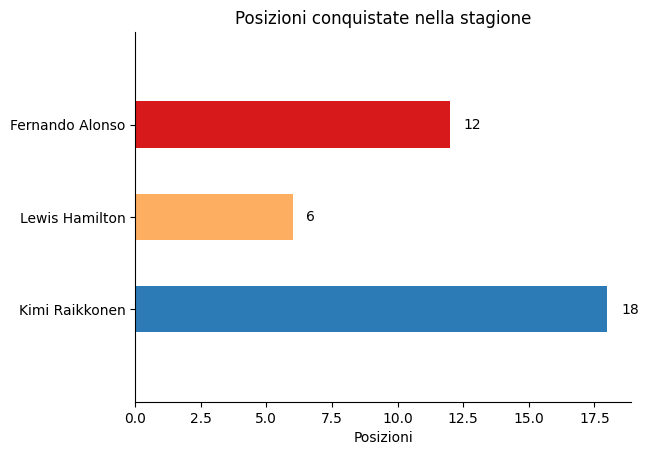

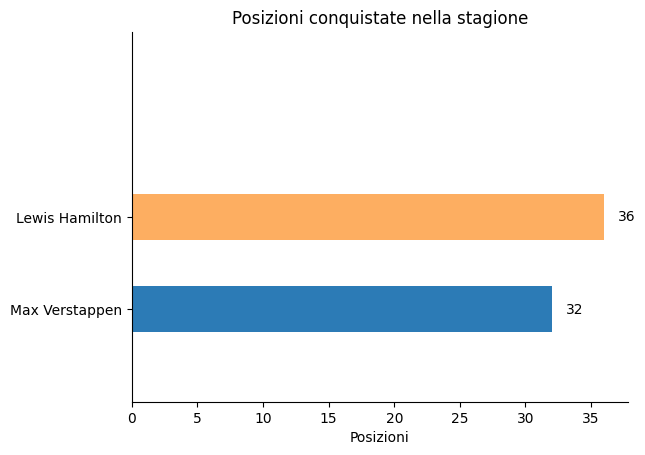

In [256]:
data = pd.read_csv('data/1984results.csv')
convertData(data, "1984", ["Niki Lauda", "Alain Prost"])

In [ ]:
data = pd.read_csv('data/1988results.csv')
convertData(data, "1988", ["Alain Prost", "Ayrton Senna"]) 

In [ ]:
data = pd.read_csv('data/2007results.csv')
convertData(data, "2007", ["Kimi Raikkonen", "Lewis Hamilton", "Fernando Alonso"])

In [ ]:
data = pd.read_csv('data/2021results.csv')
convertData(data, "2021", ["Max Verstappen", "Lewis Hamilton"])